In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
projects = pd.DataFrame.from_csv('opendata_projects.csv', index_col=None)

In [7]:
projects.tail()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
878847,b4f2f1d5cab6f64a84f7df2772bf4fbc,9ee8356813d1fd88d1157d34c517e77b,ef1c6eaec7195658a1b026d1e478c16b,2.309930e+11,43.650808,-70.267217,Portland,ME,4102,urban,...,25,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-10 00:00:00
878848,b84d6bc2819ed03aff8aa91d206a7313,9d077d48f161fe16ca5a4d9df1c13b95,45b36be80716e7d63ac79f3380a5c80d,NaN,47.232365,-122.413094,Tacoma,WA,98404,urban,...,200,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-02 00:00:00
878849,bf869faa26b69a8edbfac542daa3fd6b,eae4fe2af677acfc5cfbd2be8e401c9e,57e9efd125504e5e110fa54cb0181a90,1.300120e+11,33.782326,-84.362785,Atlanta,GA,30306,urban,...,120,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-10 00:00:00
878850,d5bc40d23916919df6673977cbfd4579,40eba7b869412b001ea603009ef9afda,7d23b9c47d4b01c33e59617d6cc2221c,NaN,33.032644,-80.237674,Summerville,SC,29483,NaN,...,54,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-10-16 00:00:00
878851,de374459245ace7b1d4112f6ec741081,ef44b81f8c99ff27faa74f1d6589bb15,85075c29b09f3a6723083b4ee962a57a,2.912010e+11,38.752922,-90.313082,Ferguson,MO,63135,suburban,...,25,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-10 00:00:00


In [8]:
len(projects)

878852

In [114]:
area = len(projects['primary_focus_area'].drop_duplicates())
subject = len(projects['primary_focus_subject'].drop_duplicates())
area,subject

(8, 29)

In [248]:
#1) Plot between Category and Status
p = projects[projects.funding_status != 'live'] # Considering only completed projects
p.loc[:,'date_completed'] = pd.to_datetime(p['date_completed'])
p.loc[:,'date_posted'] = pd.to_datetime(p['date_posted'])
p.loc[:,'date_expiration'] = pd.to_datetime(p['date_expiration'])
p1 = p.groupby(by='primary_focus_subject')
p2 = p[p.funding_status == 'completed']
p2.loc[:,'project_duration'] = p2['date_completed'] - p2['date_posted']
p2.loc[:,'project_expire_duration'] = p2['date_expiration'] - p2['date_posted']
p2.loc[:,'project_duration_days'] = p2['project_duration'].astype('timedelta64[D]')
p2.loc[:,'project_expire_duration_days'] = p2['project_expire_duration'].astype('timedelta64[D]')
p2 = p2[(p2.project_duration_days < p2.project_expire_duration_days) & (p2.project_duration_days < 200)]
p3 = p2.groupby(by='primary_focus_subject')
a = 100*p3.size()/p1.size()
b = p3['project_duration_days'].mean()

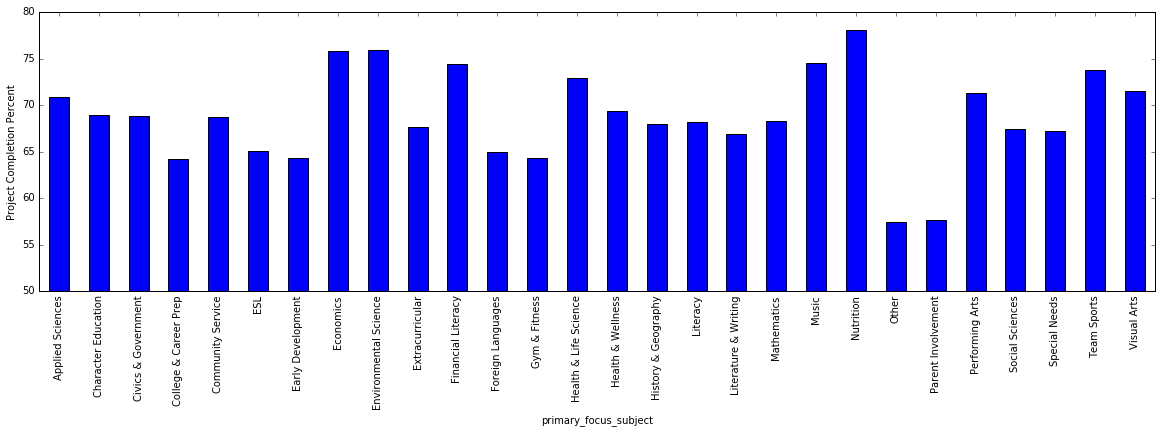

In [249]:
ax = a.plot(kind='bar',figsize=(20,5), ylim=(50,80))
ax.set_ylabel("Project Completion Percent")

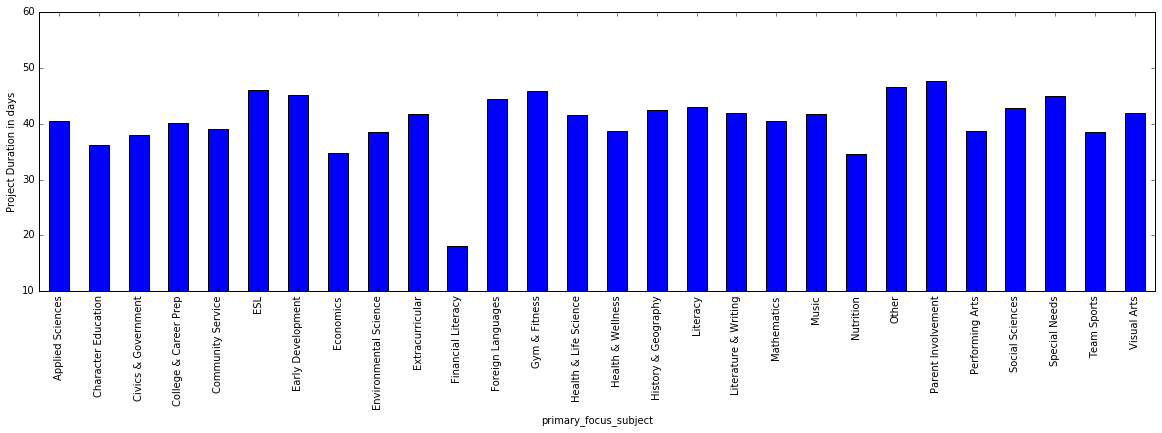

In [250]:
bx = b.plot(kind='bar',figsize=(20,5), ylim=(10,60))
bx.set_ylabel("Project Duration in days")

In [203]:
#x = pd.DataFrame(a).join(pd.DataFrame(b))
#x.plot(kind='bar',figsize=(20,5))

In [241]:
# Low performing Subjects
a[a<a.mean()].sort_values()

primary_focus_subject
Other                    56.921167
Parent Involvement       57.471264
Gym & Fitness            64.077998
Early Development        64.131097
College & Career Prep    64.213464
Foreign Languages        64.752269
ESL                      64.876067
Literature & Writing     66.786281
Special Needs            67.083086
Social Sciences          67.116244
Extracurricular          67.484983
History & Geography      67.816204
Literacy                 68.052934
Mathematics              68.131457
Civics & Government      68.542523
Community Service        68.574635
dtype: float64

In [242]:
# Top performing Subjects
a[a>a.mean()].sort_values(ascending=False)

primary_focus_subject
Nutrition                77.977528
Environmental Science    75.738354
Economics                75.649351
Financial Literacy       74.427481
Music                    74.330399
Team Sports              73.561786
Health & Life Science    72.776476
Visual Arts              71.298107
Performing Arts          71.225421
Applied Sciences         70.682422
Health & Wellness        69.196774
Character Education      68.706586
dtype: float64

1) 'Other' subject under Applied learning scored the lowest<br>
2) 'Maths' under Math&Science scored below average. All other science scored high with Envrionmental Science being the highest<br>
3) 'Nutrition' scored the highest<br>
4) Parent involvement also scored very low<br>
5) Economics,Music and Sports scored high<br>
6) Financial literacy was funded the fastest and Other the slowest

In [295]:
#p2.sort_values(by='students_reached',ascending=False)['students_reached'].head(100)
#p2.sort_values(by='project_duration_days',ascending=False).head(10)

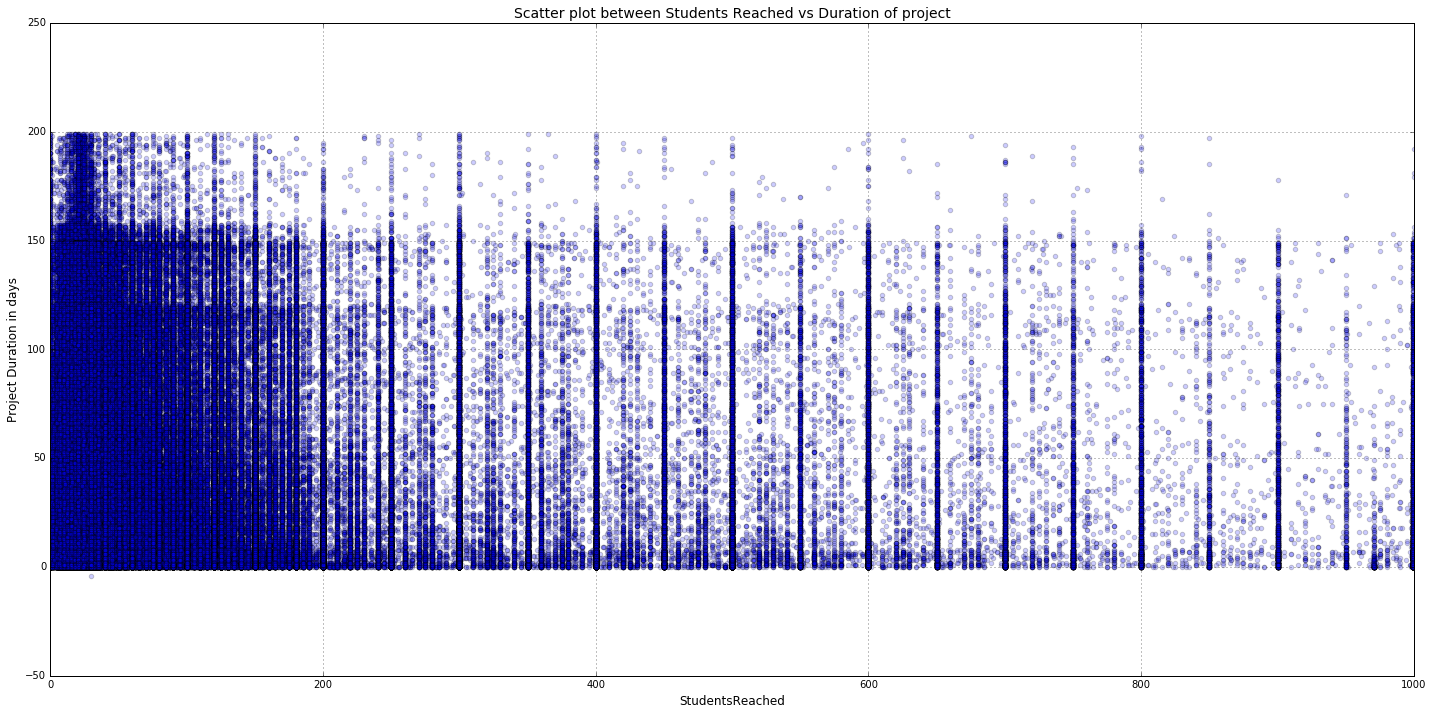

In [255]:
# Scatter plot between Students Reached vs Duration of project
x = p2['students_reached']
y = list(p2['project_duration_days'])

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, 1000])
ax.set_xlabel('StudentsReached', fontsize=12)
ax.set_ylabel('Project Duration in days', fontsize=12)
ax.set_title('Scatter plot between Students Reached vs Duration of project', fontsize=14)

ax.grid(True)
fig.tight_layout()

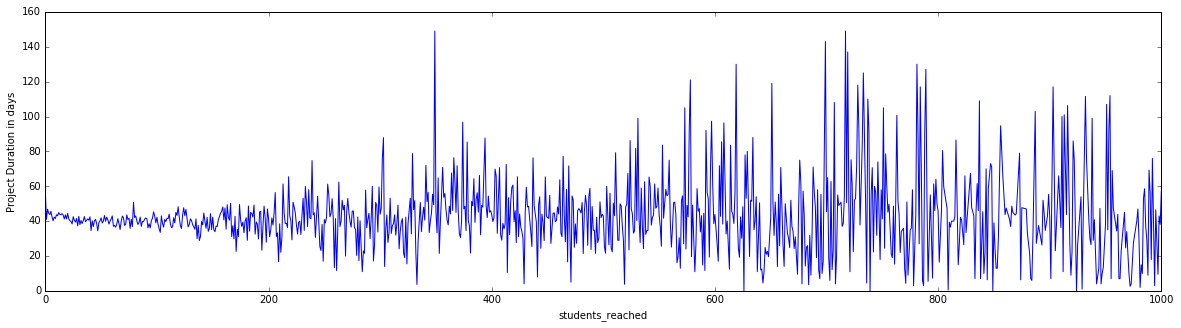

In [294]:
# Line chart between Students Reached vs Duration of project
c = p2.groupby(p2.students_reached)
c = c['project_duration_days'].mean()
cx = c.plot(kind='line',figsize=(20,5), xlim=(0,1000), ylim=(0,160))
cx.set_ylabel("Project Duration in days")

In [205]:
# 2) Plot between poverty level and status
p = projects[projects.funding_status != 'live']
p1 = p.groupby(by='poverty_level')
print 'Number of poverty levels: ',len(p1)
p2 = p[p.funding_status == 'completed']
p2 = p2.groupby(by='poverty_level')
a = 100*p2.size()/p1.size()
b = p1['total_donations'].mean()

Number of poverty levels:  4


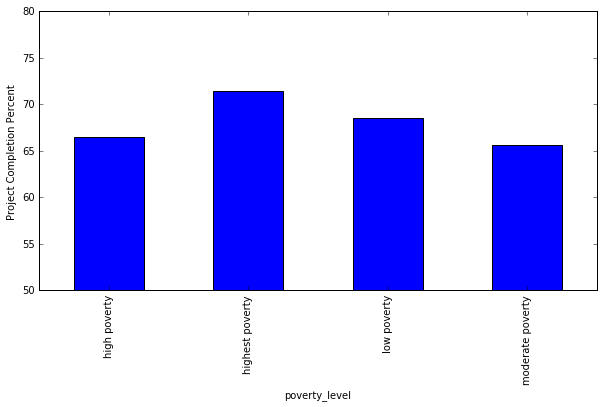

In [208]:
ax = a.plot(kind='bar',figsize=(10,5),ylim=(50,80))
ax.set_ylabel("Project Completion Percent")

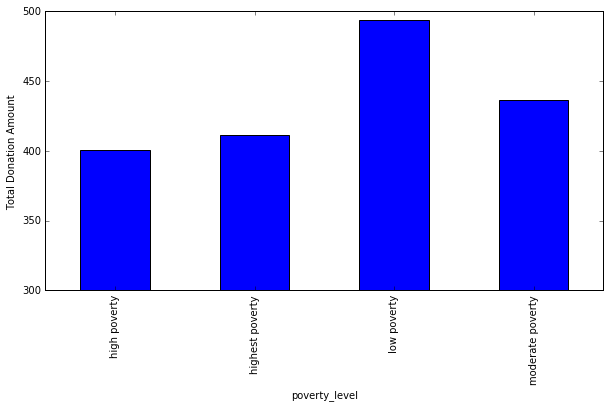

In [209]:
bx = b.plot(kind='bar',figsize=(10,5),ylim=(300,500))
bx.set_ylabel("Total Donation Amount")

In [316]:
# Finding the success of a school based on it's type
p1 = p[p.school_charter == 't']
p2 = p[p.school_magnet == 't']
p3 = p[p.school_year_round == 't']
p4 = p[p.school_nlns == 't']
p5 = p[p.school_kipp == 't']
p6 = p[p.school_charter_ready_promise == 't']
p7 = p[(p.school_charter_ready_promise == 'f') & (p.school_kipp == 'f') & (p.school_nlns == 'f') & (p.school_year_round == 'f') & (p.school_magnet == 'f') & (p.school_charter == 'f')]
p8 = p[(p.school_charter_ready_promise == 't') | (p.school_kipp == 't') | (p.school_nlns == 't') | (p.school_year_round == 't') | (p.school_magnet == 't') | (p.school_charter == 't')]
#p8=p[p.school_charter == 't'&((p.school_magnet == 't')|(p.school_year_round == 't')|(p.school_nlns == 't')|(p.school_kipp == 't')|(p.school_charter_ready_promise == 't'))]

p_p = 100 * len(p[p.funding_status == 'completed']) / len(p)
p1_p = 100 * len(p1[p1.funding_status == 'completed']) / len(p1)
p2_p = 100 * len(p2[p2.funding_status == 'completed']) / len(p2)
p3_p = 100 * len(p3[p3.funding_status == 'completed']) / len(p3)
p4_p = 100 * len(p4[p4.funding_status == 'completed']) / len(p4)
p5_p = 100 * len(p5[p5.funding_status == 'completed']) / len(p5)
p6_p = 100 * len(p6[p6.funding_status == 'completed']) / len(p6)
p7_p = 100 * len(p7[p7.funding_status == 'completed']) / len(p7)
p8_p = 100 * len(p8[p8.funding_status == 'completed']) / len(p8)

print p_p,p1_p,p2_p,p3_p,p4_p,p5_p,p6_p,p7_p,p8_p

 69 73 71 67 78 78 78 68 72


School that falls under a specific category(except year_around) has more chance of getting its funding goal fulfilled. Percentages are ?

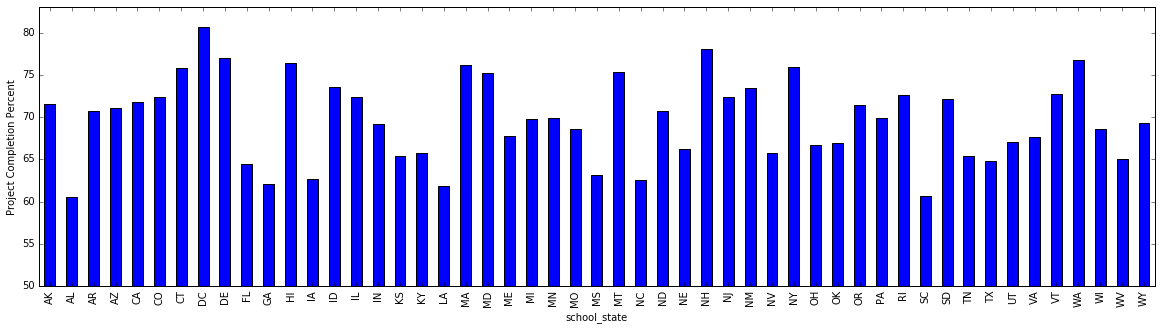

In [342]:
# Plot between state and the project completion proportion
p = p[p.school_state != 'La']
p1 = p.groupby(by='school_state')['_schoolid']
p2 = p[p.funding_status == 'completed']
p2 = p2.groupby(by='school_state')['_schoolid']
a = 100*p2.count()/p1.count()
a = a.sort_index()
ax = a.plot(kind='bar',figsize=(20,5),ylim=(50,83))
ax.set_ylabel("Project Completion Percent")

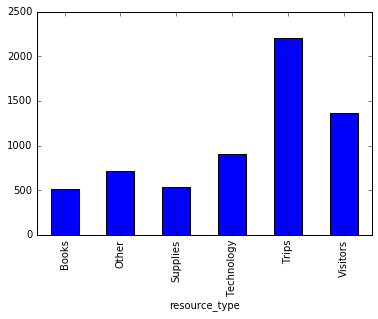

In [10]:
# Plot between Project Resource type and Donation Amount
p1 = projects.groupby(by='resource_type')
p1 = p1['total_price_including_optional_support'].mean()
p1.plot(kind='bar')